In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import glob
from keras.preprocessing.image import img_to_array

In [2]:
import imutils

In [3]:
#change file directory for each model
img = image.load_img("/content/drive/MyDrive/fyp/coding seyes/training2/finrot/40.jpg")

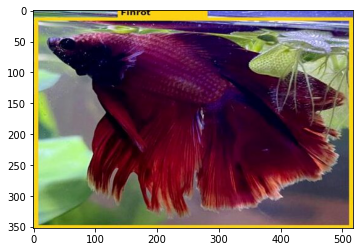

In [4]:
plt.imshow(img)

In [5]:
figsize = (10, 10)

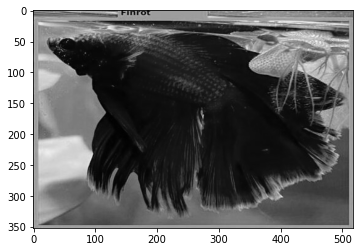

In [6]:
#change file directory for each model
image = plt.imread("/content/drive/MyDrive/fyp/coding seyes/training2/finrot/40.jpg")
plt.imshow(image)
# rgb to grayscale
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(grey, cv2.COLOR_BGR2RGB))

In [7]:
#adaptive histogram equalization (image contract enhance sharpeness)
bins_edges_min_max = [0, 256]
num_bins = 256
bin_count, bins_edges = np.histogram(image, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

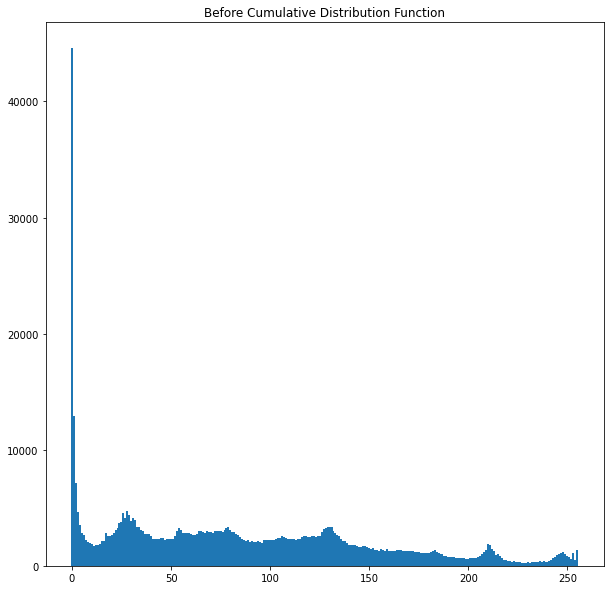

In [8]:
def draw_hist(x_axis, input):
    fig, ax = plt.subplots(figsize=figsize)
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


draw_hist(bins_start, bin_count)
plt.title("Before Cumulative Distribution Function")
plt.show()

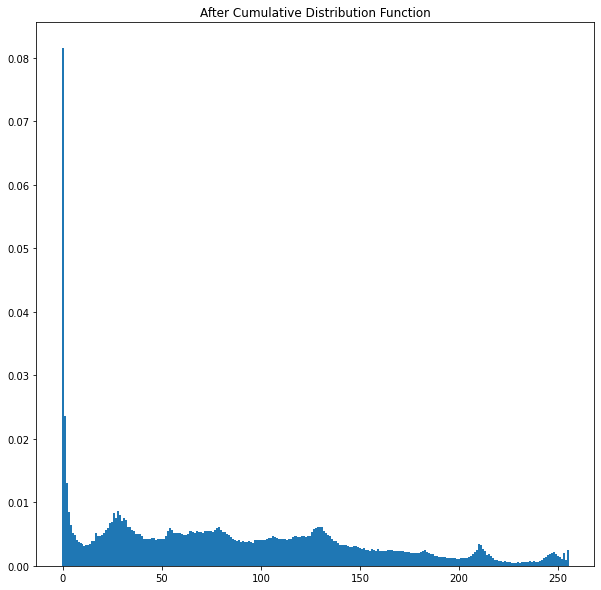

In [9]:
pdf = bin_count / np.sum(bin_count)

draw_hist(bins_start, pdf)
plt.title("After Cumulative Distribution Function")
plt.show()

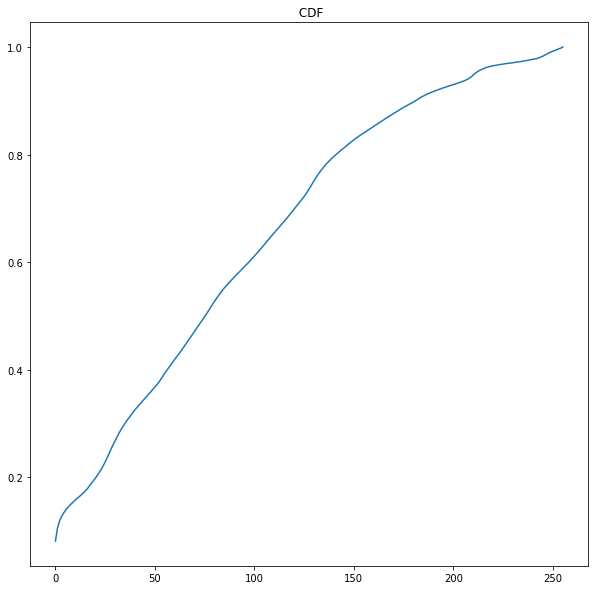

In [10]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title(" CDF")
plt.show()

In [11]:
#change file directory for each model
#cv2.imread("/content/drive/MyDrive/fyp/coding seyes/training/tumor/tumor52.jpg").shape
cv2.imread("/content/drive/MyDrive/fyp/coding seyes/training2/finrot/40.jpg")

array([[[115, 117,  95],
        [118, 118,  94],
        [123, 122,  96],
        ...,
        [191,  85,  78],
        [200,  90,  84],
        [199,  89,  83]],

       [[134, 136, 114],
        [132, 134, 112],
        [133, 132, 106],
        ...,
        [192,  86,  79],
        [197,  90,  83],
        [196,  89,  82]],

       [[141, 143, 123],
        [144, 146, 124],
        [150, 150, 126],
        ...,
        [190,  86,  79],
        [196,  92,  85],
        [198,  94,  87]],

       ...,

       [[ 74, 161, 157],
        [ 92, 203, 205],
        [ 58, 216, 234],
        ...,
        [ 14, 216, 247],
        [ 36, 213, 246],
        [ 45, 209, 244]],

       [[ 36, 133, 129],
        [ 74, 195, 197],
        [ 56, 220, 239],
        ...,
        [ 14, 216, 247],
        [ 38, 213, 246],
        [ 47, 210, 243]],

       [[  6, 109, 104],
        [ 62, 187, 191],
        [ 61, 226, 245],
        ...,
        [ 12, 214, 243],
        [ 38, 213, 246],
        [ 48, 211, 244]]

In [12]:
train = ImageDataGenerator(rescale = 1/255)
validate = ImageDataGenerator(rescale = 1/255)

In [13]:
#change file directory for each model
train_dataset = train.flow_from_directory("/content/drive/MyDrive/fyp/coding seyes/training2",
                                          target_size = (1000, 1000),
                                          batch_size = 3,
                                          class_mode = 'binary')

validate_dataset = train.flow_from_directory("/content/drive/MyDrive/fyp/coding seyes/validation2",
                                          target_size = (1000, 1000),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 117 images belonging to 2 classes.
Found 117 images belonging to 2 classes.


In [14]:
train_dataset.class_indices

{'finrot': 0, 'tumor': 1}

In [15]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
from keras.layers.core.flatten import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (1000,1000,3)),
                                     tf.keras.layers.MaxPool2D(2,2),
                                    
                                     tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     
                                     tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                    
                                     tf.keras.layers.Flatten(),
                                    
                                     tf.keras.layers.Dense(512, activation = 'relu'),
                                     tf.keras.layers.Dense(1, activation = 'sigmoid')
                                    ])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 998, 998, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 499, 499, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 497, 497, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 248, 248, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 246, 246, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 123, 123, 64)     0

In [18]:
#learning rate and optimizer
'''epochs=15
history = model.fit_generator(
    train_dataset, 
    epochs=epochs,
    validation_data= validate_dataset)'''

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [19]:
model_fit = model.fit( train_dataset,
                      epochs = 10,
                      validation_data = validate_dataset)

Epoch 1/10
39/39 [==============================] - 502s 13s/step - loss: 5.9806 - accuracy: 0.6496 - val_loss: 0.4793 - val_accuracy: 0.8718
Epoch 2/10
39/39 [==============================] - 479s 12s/step - loss: 1.0258 - accuracy: 0.7179 - val_loss: 0.4712 - val_accuracy: 0.8803
Epoch 3/10
39/39 [==============================] - 474s 12s/step - loss: 0.8370 - accuracy: 0.7863 - val_loss: 0.3276 - val_accuracy: 0.8718
Epoch 4/10
39/39 [==============================] - 475s 12s/step - loss: 0.8044 - accuracy: 0.8547 - val_loss: 0.3769 - val_accuracy: 0.8974
Epoch 5/10
39/39 [==============================] - 474s 12s/step - loss: 0.7325 - accuracy: 0.8632 - val_loss: 1.0590 - val_accuracy: 0.7607
Epoch 6/10
39/39 [==============================] - 494s 13s/step - loss: 0.3617 - accuracy: 0.9145 - val_loss: 0.1536 - val_accuracy: 0.9402
Epoch 7/10
39/39 [==============================] - 481s 12s/step - loss: 0.7717 - accuracy: 0.9316 - val_loss: 0.0866 - val_accuracy: 0.9573
Epoch 

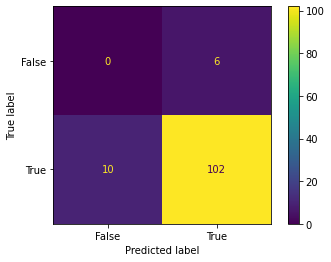

In [22]:
import sys
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
#change size for each model
actual = numpy.random.binomial(1,0.9,size = 118)
predicted = numpy.random.binomial(1,0.9,size = 118)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [23]:
Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)

In [24]:
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.864406779661017, 'Precision': 0.9444444444444444, 'Sensitivity_recall': 0.9107142857142857, 'Specificity': 0.0, 'F1_score': 0.9272727272727271}


tumor
tumor
tumor
tumor
tumor
tumor
tumor
tumor
tumor
tumor
tumor
tumor
tumor
tumor
tumor
tumor
tumor
tumor
tumor
tumor


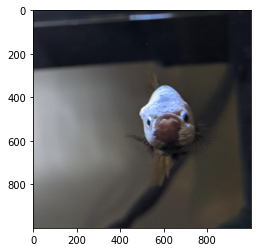

In [27]:
#change if statement for each model
dir_path = "/content/drive/MyDrive/fyp/coding seyes/testing"

for i in os.listdir(dir_path): 
  #print(i)
  pic = image.load_img(dir_path + '//' +i, target_size = (1000,1000))
  plt.imshow(pic)
  plt.show()

  c = image.img_to_array(pic)
  c = np.expand_dims(c,axis =0)
  images = np.vstack([c])
  item = model.predict(images)
  if item == 0:
    print("finrot")
  else:
    print("tumor")

In [21]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/fyp/coding seyes/modelling/model1') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/fyp/coding seyes/modelling/model1/assets
